In [44]:
import pandas as pd 
import Go_annotations
import GO_Enrichment_Calculator
import numpy as np
import Name_resolver
import tqdm as tq
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

In [4]:
top_groups = pd.read_csv('/data/passala/Post_dump_files/Generated_Tables/Comparing_all_orthogorups_across_plants/Ortho_cross_all_tables/top177_better_ortho_performance_groups.csv', index_col= 0)

In [5]:
top_groups

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,Conservation Between,AVG FC Ortho,FC Species Present Ortho,Conservation Between Ortho,Gene minus Ortho
485653at3193,13,10,0.599338,0.879024,Genes,0.866388,14,Orthogroups,-0.267050
784291at3193,14,11,0.591378,0.904827,Genes,0.850309,14,Orthogroups,-0.258932
874520at3193,15,11,0.598040,0.967693,Genes,0.847304,15,Orthogroups,-0.249265
868593at3193,15,12,0.629234,0.762570,Genes,0.875838,15,Orthogroups,-0.246604
866254at3193,15,12,0.576279,0.677560,Genes,0.812831,15,Orthogroups,-0.236552
...,...,...,...,...,...,...,...,...,...
887584at3193,8,10,0.723906,0.995956,Genes,0.883301,11,Orthogroups,-0.159395
29923at3193,11,12,0.666327,0.539315,Genes,0.825715,15,Orthogroups,-0.159387
671526at3193,4,9,0.694627,0.844414,Genes,0.853469,12,Orthogroups,-0.158843
123690at3193,10,11,0.622234,0.979809,Genes,0.780878,15,Orthogroups,-0.158644


In [6]:
def get_ncbi_clean_og2gene_for_species(species_1, og2genes_only_cococonet, ncbi_mapping):


    species_1_name = Name_resolver.species_name_resolver(species_1,desired_type='common')

    first_species_ortho_groups = og2genes_only_cococonet.loc[og2genes_only_cococonet['Species'] == species_1]
    shared_orthogroups = first_species_ortho_groups['Orthogroup'].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(shared_orthogroups,desc ='inner_loop',position= 0,leave = False):
        species_1_genes = first_species_ortho_groups['Gene'].loc[first_species_ortho_groups['Orthogroup']== orthogroup].to_list()
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(columns = [f'{species_1_name} OrthoGene'], data = all_gene_combos)
        current_orthogroup_pd['Orthogroup'] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(right = ncbi_mapping[['Orthodb Gene','Symbol']], right_on = 'Orthodb Gene',left_on=f'{species_1_name} OrthoGene')
    ncbi_added_once_clean= ncbi_added_once.drop(columns = 'Orthodb Gene')
    return ncbi_added_once_clean

In [7]:
og_groups = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv')
ncbi_mapping = pd.read_csv('/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv')

In [8]:
Name_resolver.species_name_resolver('arabidopsis', 'taxa_id')

3702

In [9]:
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [10]:
arabi_gene_lineup = get_ncbi_clean_og2gene_for_species(3702,og_groups,ncbi_mapping)

inner_loop:   0%|          | 0/15558 [00:00<?, ?it/s]

In [11]:
top_groups

,EGAD Species Present,FC Species Present,AVG FC,AVG EGAD,Conservation Between,AVG FC Ortho,FC Species Present Ortho,Conservation Between Ortho,Gene minus Ortho
485653at3193,13,10,0.599338,0.879024,Genes,0.866388,14,Orthogroups,-0.267050
784291at3193,14,11,0.591378,0.904827,Genes,0.850309,14,Orthogroups,-0.258932
874520at3193,15,11,0.598040,0.967693,Genes,0.847304,15,Orthogroups,-0.249265
868593at3193,15,12,0.629234,0.762570,Genes,0.875838,15,Orthogroups,-0.246604
866254at3193,15,12,0.576279,0.677560,Genes,0.812831,15,Orthogroups,-0.236552
...,...,...,...,...,...,...,...,...,...
887584at3193,8,10,0.723906,0.995956,Genes,0.883301,11,Orthogroups,-0.159395
29923at3193,11,12,0.666327,0.539315,Genes,0.825715,15,Orthogroups,-0.159387
671526at3193,4,9,0.694627,0.844414,Genes,0.853469,12,Orthogroups,-0.158843
123690at3193,10,11,0.622234,0.979809,Genes,0.780878,15,Orthogroups,-0.158644


In [12]:
genes_in_top_groups = arabi_gene_lineup.loc[arabi_gene_lineup['Orthogroup'].isin(top_groups.index)]

In [13]:
genes_in_top_groups

,arabidopsis OrthoGene,Orthogroup,Symbol
493,3702_0:0000c5,113107at3193,AT1G09550
494,3702_0:000460,113107at3193,AT1G57590
495,3702_0:0025db,113107at3193,AT2G46930
496,3702_0:0038e3,113107at3193,AT3G62060
497,3702_0:0039ae,113107at3193,AT3G09405
...,...,...,...
25408,3702_0:001ab9,889988at3193,AT1G13635
25409,3702_0:001b81,889988at3193,AT1G75090
25410,3702_0:003ee2,889988at3193,AT3G12710
25411,3702_0:0056b9,889988at3193,AT5G57970


In [14]:
genes_in_top_groups_one_per_group = genes_in_top_groups.sample(frac=1).drop_duplicates(subset = 'Orthogroup')

In [15]:
genes_in_top_groups_one_per_group

,arabidopsis OrthoGene,Orthogroup,Symbol
5966,3702_0:000a51,27462at3193,AT1G10940
2200,3702_0:005e81,124903at3193,AT5G13000
3849,3702_0:0016a4,135415at3193,AT1G78080
3017,3702_0:0037b7,129852at3193,AT3G13890
23057,3702_0:00186c,882946at3193,AT1G67590
...,...,...,...
24871,3702_0:001e0f,888487at3193,AT2G44400
20226,3702_0:002bb7,871446at3193,AT2G47180
3239,3702_0:002eb2,131275at3193,AT3G16720
4341,3702_0:00012e,138578at3193,AT1G28480


In [16]:
arabi_go = Go_annotations.get_go_annotations_as_panda('arabidopsis')

In [26]:
rice_num_terms = arabi_go.sum().T
rice_num_terms = pd.DataFrame(rice_num_terms, columns = ['Number Annotated Genes'])
rice_num_terms

,Number Annotated Genes
GO_term,
GO:0000002,5.0
GO:0000003,1947.0
GO:0000009,3.0
GO:0000012,5.0
GO:0000014,11.0
...,...
GO:2001280,2.0
GO:2001289,9.0
GO:2001293,7.0


In [17]:
cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(arabi_go, gene_list= genes_in_top_groups_one_per_group['Symbol'].values)

In [18]:
results_step_1 = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(cont_tables, arabi_go)

In [19]:
results_step_1.sort_values(by = 'P_value')

,P_value
GO_term,
GO:0071554,4.215457e-09
GO:0009628,1.286459e-08
GO:0050896,5.518222e-08
GO:0005975,8.474803e-08
GO:0071944,1.317165e-07
...,...
GO:0016161,1.000000e+00
GO:0016165,1.000000e+00
GO:0016166,1.000000e+00


In [20]:
corrected_results = GO_Enrichment_Calculator.multi_hypothesis_correct_fishers_exact(results_step_1)

In [27]:
corrected_results['Number Annotated Genes'] = rice_num_terms['Number Annotated Genes']

In [30]:
corrected_results.sort_values(by = 'P_value').head(50)

,P_value,Number Annotated Genes
GO_term,,
GO:0071554,0.000045,759.0
GO:0009628,0.000069,2403.0
GO:0050896,0.000197,7027.0
GO:0005975,0.000227,1163.0
GO:0071944,0.000282,4695.0
GO:0065008,0.000354,1406.0
GO:0005976,0.000432,500.0
GO:0010033,0.000620,2307.0
GO:0048046,0.000669,528.0


In [22]:
all_go_terms = pd.read_csv('/home/passala/Gene_duplication_project/Data_from_others/go_terms.txt',sep = '\t')

In [31]:
named_go = corrected_results.merge(right = all_go_terms, left_index=True, right_index= True)

In [32]:
named_go

,P_value,Number Annotated Genes,Name
GO:0000002,1.0,5.0,mitochondrial genome maintenance
GO:0000003,1.0,1947.0,reproduction
GO:0000009,1.0,3.0,"alpha-1,6-mannosyltransferase activity"
GO:0000012,1.0,5.0,single strand break repair
GO:0000014,1.0,11.0,single-stranded DNA endodeoxyribonuclease acti...
...,...,...,...
GO:2001280,1.0,2.0,positive regulation of unsaturated fatty acid ...
GO:2001289,1.0,9.0,lipid X metabolic process
GO:2001293,1.0,7.0,malonyl-CoA metabolic process
GO:2001294,1.0,2.0,malonyl-CoA catabolic process


In [33]:
top_40_go = named_go.sort_values(by = 'P_value').loc[named_go['Number Annotated Genes']<300].head(40)

In [36]:
top_40_go['Neg Log P Val'] =-1* np.log10(top_40_go['P_value'])
top_40_go.head()

,P_value,Number Annotated Genes,Name,Neg Log P Val
GO:0009611,0.000681,227.0,response to wounding,3.166811
GO:0010243,0.000793,294.0,response to organonitrogen compound,3.100886
GO:0042546,0.000869,241.0,cell wall biogenesis,3.060742
GO:0010200,0.001062,144.0,response to chitin,2.974016
GO:0000271,0.002192,218.0,polysaccharide biosynthetic process,2.659209


In [39]:
top_40_go.head(12)

,P_value,Number Annotated Genes,Name,Neg Log P Val
GO:0009611,0.000681,227.0,response to wounding,3.166811
GO:0010243,0.000793,294.0,response to organonitrogen compound,3.100886
GO:0042546,0.000869,241.0,cell wall biogenesis,3.060742
GO:0010200,0.001062,144.0,response to chitin,2.974016
GO:0000271,0.002192,218.0,polysaccharide biosynthetic process,2.659209
GO:0034637,0.014568,225.0,cellular carbohydrate biosynthetic process,1.836594
GO:0009698,0.030582,136.0,phenylpropanoid metabolic process,1.514541
GO:0009873,0.032685,197.0,ethylene-activated signaling pathway,1.485656
GO:0010329,0.037632,20.0,auxin efflux transmembrane transporter activity,1.424439
GO:0010015,0.039962,275.0,root morphogenesis,1.398356


In [40]:
top_40_go['Name'] = top_40_go['Name'].str.capitalize()
top_40_go

,P_value,Number Annotated Genes,Name,Neg Log P Val
GO:0009611,0.000681,227.0,Response to wounding,3.166811
GO:0010243,0.000793,294.0,Response to organonitrogen compound,3.100886
GO:0042546,0.000869,241.0,Cell wall biogenesis,3.060742
GO:0010200,0.001062,144.0,Response to chitin,2.974016
GO:0000271,0.002192,218.0,Polysaccharide biosynthetic process,2.659209
GO:0034637,0.014568,225.0,Cellular carbohydrate biosynthetic process,1.836594
GO:0009698,0.030582,136.0,Phenylpropanoid metabolic process,1.514541
GO:0009873,0.032685,197.0,Ethylene-activated signaling pathway,1.485656
GO:0010329,0.037632,20.0,Auxin efflux transmembrane transporter activity,1.424439
GO:0010015,0.039962,275.0,Root morphogenesis,1.398356


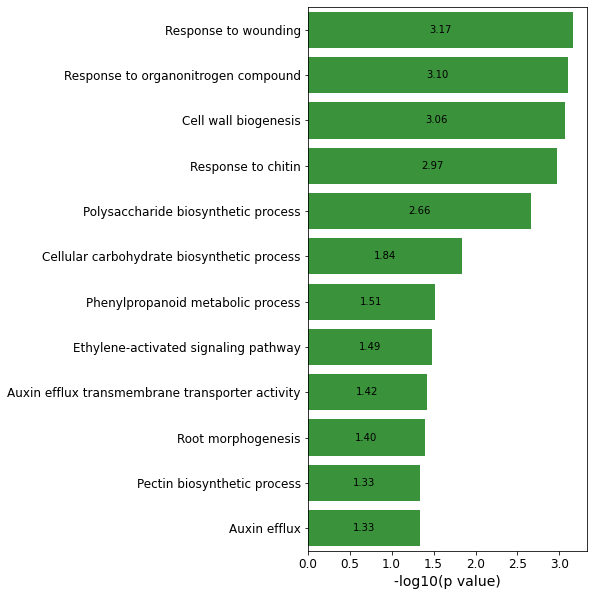

In [46]:
fig, ax = plt.subplots(figsize = (5,10))
fig.patch.set_facecolor('white')
g = sns.barplot(data = top_40_go.head(12), x = 'Neg Log P Val',y = 'Name', color = 'tab:green')
#plt.ylabel("Euclidian Distance of Coexpressalog from Target Gene", fontsize = 15)
plt.xlabel("-log10(p value)", fontsize = 14)
g.set(ylabel=None)
#sns.despine()
g.bar_label(g.containers[0], fmt='%.2f', label_type='center')

g.grid(False)
g.spines["bottom"].set_color("black")
g.spines["left"].set_color("black")
g.spines["top"].set_color("black")
g.spines["right"].set_color("black")
#ax.set_xscale('log')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
#plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('/data/passala/Plots_for_projects/Cross_species_go_groups/Go_groups_enrich/go_group_enrichment.pdf',bbox_inches = 'tight')